### Сравнение времени алгоритмов вычисления автокорреляции

Данные взяты из файла `autocorrelation_times.csv`, который генерируется в результате тестов на случайных многочленах (функция `autocorrelationTest` в файле `test.cpp`).

Тест для каждой степени выполняется 100 раз, после чего вычисляется среднее время выполнения.

Рассматриваются многочлены степени от 10 до 500 с шагом 10.

---

### Описание алгоритмов

Сравниваются два подхода к вычислению автокорреляции:

1. **Прямое вычисление по определению** — перебор всех пар элементов.  
   Сложность: $O(n^2)$.

2. **Использование быстрого преобразования Фурье (БПФ)** — более эффективный метод.  
   Сложность: $O(n \log n)$.

---

### Графики

Ниже приведены два графика:

- С линейной шкалой по осям.
- С логарифмической шкалой по осям.

Ось x - количество элементов последовательности

Ось y - время выполнения в милисекундах

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("../files/autocorrelation_times.csv")

print(df.head())  

    n   naive     fft
0  10  0.1797  2.8687
1  20  0.4950  3.2043
2  30  0.8439  2.8234
3  40  1.3255  3.5845
4  50  1.9975  3.4907


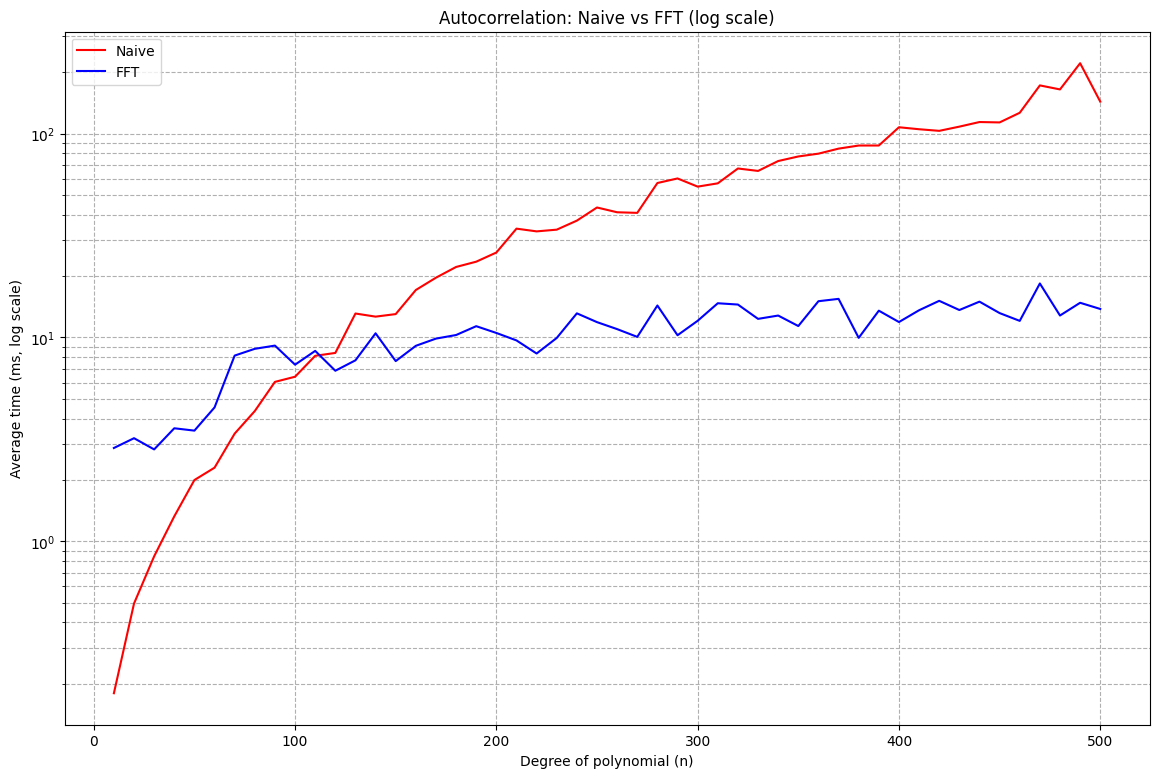

In [58]:
plt.figure(figsize=(14,9))
plt.semilogy(df['n'], df['naive'], label='Naive', color='red')
plt.semilogy(df['n'], df['fft'], label='FFT', color='blue')


plt.xlabel('Degree of polynomial (n)')
plt.ylabel('Average time (ms, log scale)')
plt.title('Autocorrelation: Naive vs FFT (log scale)')
plt.legend()
plt.grid(True, which='both', ls='--')
plt.show()


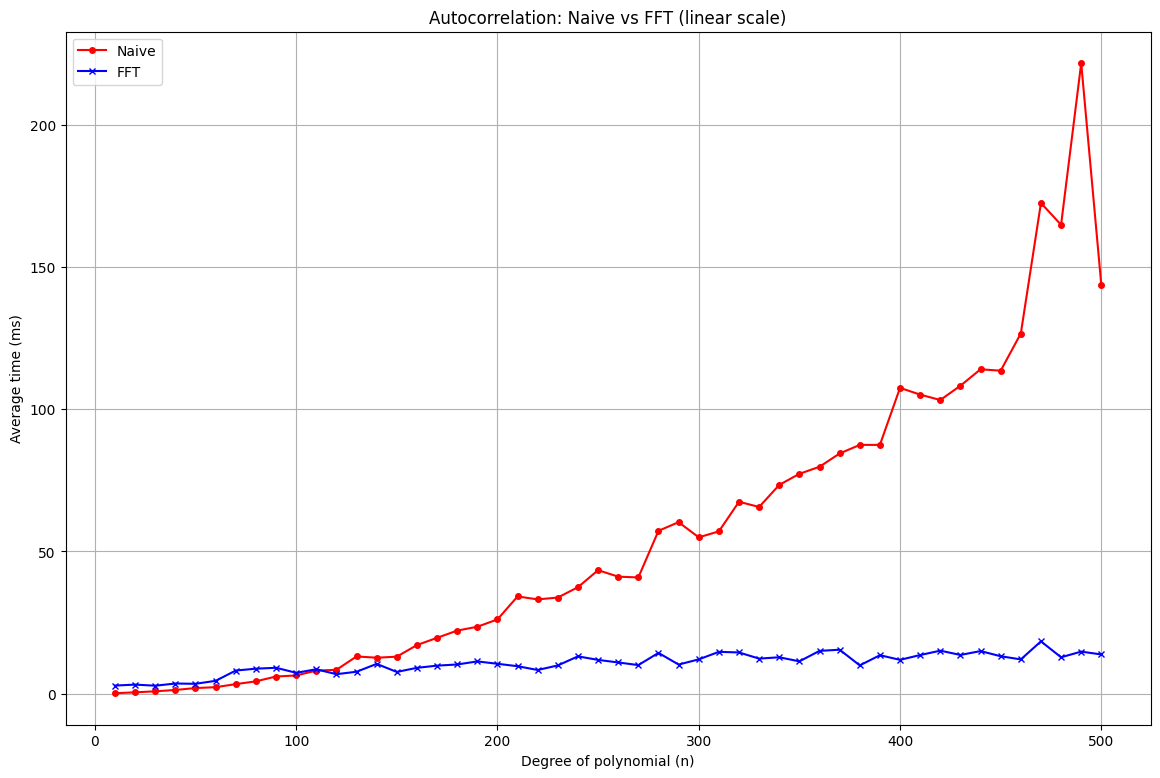

In [59]:
plt.figure(figsize=(14,9))
plt.plot(df['n'], df['naive'], label='Naive', color='red', marker='o', markersize=4)
plt.plot(df['n'], df['fft'], label='FFT', color='blue', marker='x', markersize=4)

plt.xlabel('Degree of polynomial (n)')
plt.ylabel('Average time (ms)')
plt.title('Autocorrelation: Naive vs FFT (linear scale)')
plt.legend()
plt.grid(True)
plt.show()

In [60]:
faster_n = df[df['fft'] < df['naive']]['n'].min()
print(f"FFT начинает быть быстрее при n >= {faster_n}")

FFT начинает быть быстрее при n >= 120


### Сравнение автокорреляции для случайного многочлена и многочлена Шапиро

Данные основаны на двух файлах:
- `random_poly.txt` — коэффициенты случайного многочлена степени 255.
- `flat_poly.txt` — коэффициенты многочлена Шапиро 

Полученны в результате выполнения теста `shapiroTest` из файла `test.cpp`.

---

Рассматриваются многочлены степени **255**, поскольку многочлены Шапиро строятся таким образом, что количество коэффициентов соответствует степени двойки (в данном случае $ 2^8 = 256 $ коэффициентов).

---

#### Графики

Приведены два графика, отражающие ключевые свойства многочленов:

1. Показана боковая автокорреляция (при ненулевом сдвиге).  
   Вычислено максимальное значение боковой автокорреляции для каждого типа многочлена.

2. 
   Отображено поведение модуля многочлена $ |P(z)| $ при $ |z| = 1 $, то есть на комплексной единичной окружности.

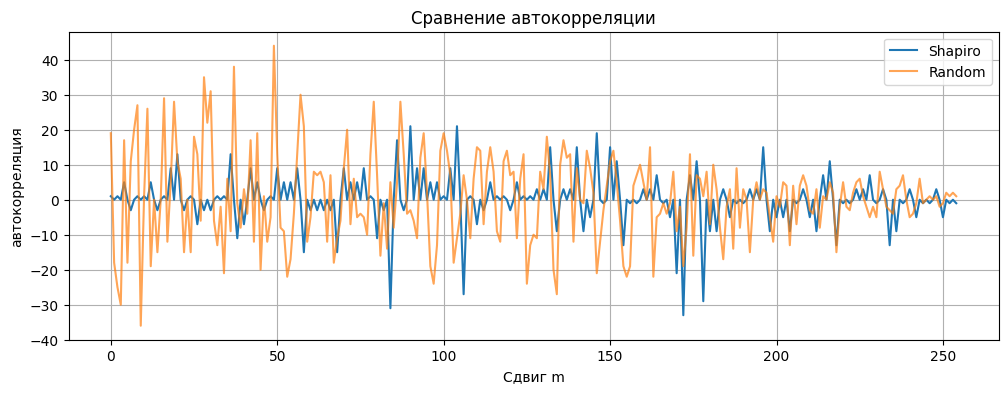

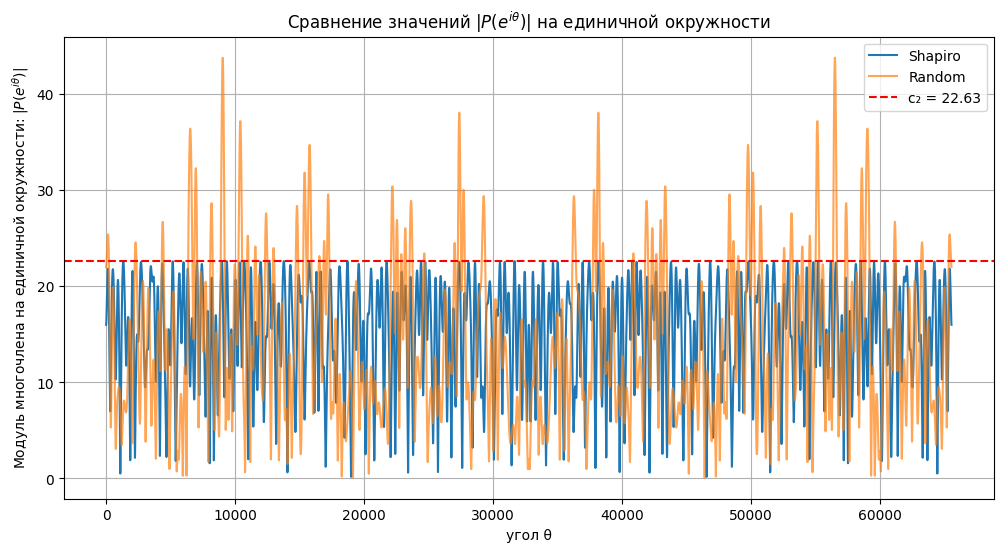

Максимум боковой автокорреляции
Flat: 21
Random: 44


In [61]:
with open('../files/random_poly.txt', 'r') as f:
    random_coeffs = np.array([int(x) for x in f.read().split()])

with open('../files/shapiro_poly.txt', 'r') as f:
    shapiro_coeffs = np.array([int(x) for x in f.read().split()])

n = len(shapiro_coeffs)

c2 = np.sqrt((n)*2) # верхняя оценка нормы многочлена на единичной окружности  

def normalized_side_autocorr(coeffs):
    autocorr = np.correlate(coeffs, coeffs, mode='full')
    n = len(coeffs) - 1
    side_autocorr = autocorr[n+1:]
    return side_autocorr

flat_side = normalized_side_autocorr(shapiro_coeffs)
rand_side = normalized_side_autocorr(random_coeffs)

def spectrum_magnitude(coeffs, fft_size=2**16):
    spectrum = np.fft.fft(coeffs, fft_size)
    return np.abs(spectrum)

flat_spectrum = spectrum_magnitude(shapiro_coeffs)
rand_spectrum = spectrum_magnitude(random_coeffs)

plt.figure(figsize=(12,4))
plt.plot(flat_side, label='Shapiro')
plt.plot(rand_side, label='Random', alpha=0.7)
plt.xlabel('Сдвиг m')
plt.ylabel('автокорреляция')
plt.title('Сравнение автокорреляции')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12,6))
plt.plot(flat_spectrum, label='Shapiro')
plt.plot(rand_spectrum, label='Random', alpha=0.7)
plt.axhline(y=c2, color='red', linestyle='--', label=f'c₂ = {c2:.2f}')
plt.xlabel('угол θ')
plt.ylabel(r'Модуль многочлена на единичной окружности: $|P(e^{i\theta})|$')
plt.title(r'Сравнение значений $|P(e^{i\theta})|$ на единичной окружности')
plt.legend()
plt.grid(True)
plt.show()

print("Максимум боковой автокорреляции")
print("Flat:", np.max(flat_side))
print("Random:", np.max(rand_side))


Видно, что для многочлена Шапиро выполняется теоретическая оценка сверху на значения автокорреляции и модуля на единичной окружности.

В частности, максимальное значение модуля многочлена на единичной окружности не превышает $$ \sqrt{2n} = \sqrt{2 \cdot 256} \approx \sqrt{510} \approx 22.63 $$

Многочлены Шапиро демонстрируют значительно более равномерное распределение автокорреляции и ограниченный рост значений на единичной окружности, что подтверждает их хорошие спектральные свойства.